In [111]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [112]:
pip install regex

Note: you may need to restart the kernel to use updated packages.


## SHARK ATTACKS

In [167]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [231]:
df = pd.read_excel("/Users/admin/Desktop/IRONHACK/2.WEEK/MINI_PY/GSAF5.xls")

**OVERVIEW** 

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6969 entries, 0 to 6968
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6944 non-null   object 
 1   Year            6942 non-null   float64
 2   Type            6926 non-null   object 
 3   Country         6894 non-null   object 
 4   State           6462 non-null   object 
 5   Location        6379 non-null   object 
 6   Activity        6358 non-null   object 
 7   Name            6724 non-null   object 
 8   Sex             6365 non-null   object 
 9   Age             3950 non-null   object 
 10  Injury          6909 non-null   object 
 11  Unnamed: 11     6382 non-null   object 
 12  Time            3418 non-null   object 
 13  Species         3812 non-null   object 
 14  Source          6925 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6819 non-null   object 
 17  href            6796 non-null   o

In [233]:
df.shape

(6969, 23)

- `NUMBER OF COLUMNS:`23
- `NUMBER OF ROWS:` 6969


## CLEAN OF THE DATAFRAME
1. We delete columns that are not necessary.
2. We delete rows with nulls or duplicates.
3. We delete duplicate rows.


In [234]:
#vemos columnas y decidimos que quitar
df['Location'].unique()

array(['Bargara Beach', "Old Man's, Waikiki", 'Rainbows, Oahu', ...,
       'Ocracoke Inlet', 'Panama Bay 8ºN, 79ºW',
       'Below the English fort, Trincomalee'], dtype=object)

- We focus our analysis in the last 20 years of shark attacks, so we decide to delete columns and rows that are not necessary. 

In [235]:
df['Date'].unique()

array(['15 Mar 2024', '04 Mar 2024', '02 Mar-2024', ..., '1883-1889',
       '1845-1853', nan], dtype=object)

In [236]:
#1. Delete columns:
df = df.drop(['pdf', 'href formula','href','Case Number','Case Number.1','original order','Unnamed: 21','Unnamed: 22','Unnamed: 11','Time','Location','Name'], axis=1)

In [237]:
# Convert columns names to in lower case
df.columns = df.columns.str.lower()

In [238]:
#2. Delete rows: delete the years before 2004 and show only 2004-2024
df_filter = df.loc[(df['year'] > 2003) & (df['year'] <= 2024)]
df = df_filter.copy()

In [239]:
#Eliminate duplicates rows 
df_drop_duplicates = df.drop_duplicates(inplace=False)
df = df_drop_duplicates.copy()

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2324 entries, 0 to 2324
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2324 non-null   object 
 1   year      2324 non-null   float64
 2   type      2310 non-null   object 
 3   country   2322 non-null   object 
 4   state     2220 non-null   object 
 5   activity  2219 non-null   object 
 6   sex       2236 non-null   object 
 7   age       1735 non-null   object 
 8   injury    2316 non-null   object 
 9   species   1458 non-null   object 
 10  source    2315 non-null   object 
dtypes: float64(1), object(10)
memory usage: 217.9+ KB


In [241]:
df.shape

(2324, 11)

- `NUMBER OF COLUMNS:`11
- `NUMBER OF ROWS:` 2324


# Transform values in columns 
- Cheks values
- Defined values with the same logics


`Column: Type`

In [242]:
df['type'] = df['type'].str.replace(" ", "")
#df = df.replace(to_replace = [" Provoked"], value = [["Provoked"]]) #para remplazar palabras en una columna

We decide to organize the values in four categories: 
- Unprovoked
- Provoked
- Unconfirmed = Questionable, Unverified, Invalid, '?', Underinvestigation
- Exogens = Watercraft, SeaDisaster

In [243]:
df['type'] = df['type'].replace({
    "Questionable": "Unconfirmed",
    "Unverified": "Unconfirmed",
    "Invalid": "Unconfirmed",
    "?": "Unconfirmed",
    "Underinvestigation": "Unconfirmed"
})         

In [244]:
df['type'] = df['type'].replace({
    "Watercraft": "Exogens",
    "SeaDisaster": "Exogens",
})         


In [245]:
df["type"].unique()

array(['Unprovoked', 'Provoked', 'Unconfirmed', 'Exogens', nan],
      dtype=object)

`Column: Country`

- Convert all to lowercase
- Define territorys to the correspondents country:
  - British Overseas Territory  = England
  - Coral Sea  = Australia
  - PALESTINIAN TERRITORIES  = Palestina

In [246]:
df['country'] = df['country'].replace({
    "ST HELENA, British overseas territory": "ENGLAND",
    "British Overseas Territory" : "ENGLAND",
    "CORAL SEA": "AUSTRALIA",
    "PALESTINIAN TERRITORIES":"PALESTINA"
})         


In [247]:
df['country'] = df['country'].str.title()

In [248]:
df["country"].unique()

array(['Australia', 'Usa', 'India', 'Trinidad', 'Bahamas', 'South Africa',
       'Mexico', 'New Zealand', 'Egypt', 'Belize', 'Philippines',
       'Coral Sea', 'Spain', 'Portugal', 'Samoa', 'Colombia', 'Ecuador',
       'French Polynesia', 'New Caledonia', 'Turks And Caicos', 'Cuba',
       'Brazil', 'Seychelles', 'Argentina', 'Fiji', 'Maldives', 'England',
       'Japan', 'Indonesia', 'Jamaica', 'Thailand', 'Columbia',
       'Costa Rica', 'Canada', 'Jordan', 'St Kitts / Nevis', 'St Martin',
       'Papua New Guinea', 'Reunion Island', 'Israel', 'China', 'Ireland',
       'Italy', 'Malaysia', 'Libya', nan, 'Mauritius', 'Solomon Islands',
       'Comoros', 'Reunion', 'United Kingdom', 'United Arab Emirates',
       'Cape Verde', 'Dominican Republic', 'Cayman Islands', 'Aruba',
       'Mozambique', 'Puerto Rico', 'Atlantic Ocean', 'Greece',
       'St. Martin', 'France', 'Trinidad & Tobago', 'Kiribati',
       'Diego Garcia', 'Taiwan', 'Palestina', 'Guam', 'Nigeria', 'Tonga',
       'S

In [249]:
df.head()

,date,year,type,country,state,activity,sex,age,injury,species,source
0,15 Mar 2024,2024.0,Unprovoked,Australia,Queensland,Swimming,F,13,"Minor injuries to back, abdomen and legs",Tiger shark,"Yahoo News, 3/15/2024"
1,04 Mar 2024,2024.0,Unprovoked,Usa,Hawaii,Surfing,M,NaN,"No injury, shark bit surfboard",Tiger shark 8',"Surfer, 3/6/2024F"
2,02 Mar-2024,2024.0,Unprovoked,Usa,Hawaii,Swimming,F,11,Lacerations to left foot,3' to 4' shark,"Hawaii News Now, 3/4/2024"
3,25 Feb-2024,2024.0,Unprovoked,Australia,Western Australia,NaN,F,46,Leg bitten,Tiger shark,"WA Today, 2/26/2024"
4,14 Feb-2024,2024.0,Unprovoked,India,Maharashtra,Fishing,M,32,Calf of lower left leg injured,"Bull shark, 7'","Times of India, 2/14/2024"


`Column: Activity`

In [250]:
df['activity'].unique()

array(['Swimming', 'Surfing', nan, 'Fishing', 'Spearfishing',
       'Free diving', 'Foil Boarding', 'Wading', 'Snorkeling',
       'Paddle boarding', 'Scuba diving',
       'On a round-the-world expedition', 'Kayak fishing',
       'Towing a dead whale out to sea', 'Boogie boarding', 'Freediving',
       'Sitting', 'Watching the sardine run', 'Standing', 'Filming',
       'Kite surfing', 'Jumped overboard', 'Diving for crayfish',
       'Windsurfing', 'Kite-Surfing', 'Surf-sking',
       'Diving with  surface-supplied air', 'Spearishing',
       'Snorkeling at Shark Feeding site', 'Diving/Shark Feeding',
       'Diving', 'Surf skiing ', 'Shipwreck', 'Swimming  or Snorkeling',
       'Kayaking', 'Paddleboarding', 'Lobstering',
       'Lifeguard Training Exercise', 'Lifeguard Exercises', 'Scalloping',
       'Jumped into water', 'Playing in the water',
       'Feeding sharks & stingrays', 'Fihing', 'Surface Supplied  Diving',
       'Floating in inflatable pool ring', 'Fishing for shark

In [251]:
 # Dict per activity
dict_activity = {
    # Board Activities/Sports
    r'[Ss]urf|[Bb]oard|[Bb]og|[Ff]oil|[Kk]ite|[Ss]ail|[Pp]addle|[Kk]aya': 'Board activities/sports',
    # Swimming Activities/Sports
    r'[Ss]wimming|[Ss]norke|[Ff]ree|[Dd]iving|[Tt]reading|[Mm]arathon': 'Swimming activities/sports',
    # Playing or Floating in the Water
    r'[Pp]lay|[Ff]loat|[Ss]it|[Ss]tand|[Jj]ump|[Bb]ath|[Ss]occer|[Cc]rawling|[Ww]ash|[Ss]and|[Ll]ife|[Ss]quat|[Ss]ee': 'Playing or floating in the water',
    # Fishing Activities
    r'"[Ff]ish|[Ll]obster|[Cc]rab|[Ss]hrimp|[Tt]agg|[Ss]hark|[Ff]eed|[Hh]arass|[Dd]ragg"gm': 'Fishing activities',
    #Boat Activities
    r'[Bo]at|[Ss]hip': "Boat activities",
    # Other
    r'[Ff]ilming|[Dd]olphins|[Dd]isaster|[Rr]escu|[Aa]ttempt|[Hh]ands|[Tt]ouch': 'Other'
}

In [252]:
# Function to categorize activities
def categorize_activities(text, dict_activity):
    if isinstance(text, str):  # Check if the value is a text string
        for pattern, category in dict_activity.items():
            if re.search(pattern, text):
                return category
    return "Other"  # If it does not match any category, "Other" is returned.

# Clear invalid values in the "activity" column
df["activity"] = df["activity"].fillna("empty")  # Fill NaN values with an empty string
df["activity"] = df["activity"].astype(str)  # Convert all values to text strings
# Apply the function to categorize activities
df["activity"] = df["activity"].apply(lambda x: categorize_activities(x, dict_activity))
df["activity"].unique()

array(['Swimming activities/sports', 'Board activities/sports', 'Other',
       'Playing or floating in the water', 'Boat activities',
       'Fishing activities'], dtype=object)

In [253]:
count_activity = df["activity"].value_counts()
print(count_activity)

activity
Board activities/sports             957
Swimming activities/sports          614
Other                               594
Playing or floating in the water     91
Fishing activities                   59
Boat activities                       9
Name: count, dtype: int64


`Column: Species`
- Delete space in column name because display an error when we call the column
- Attempt to find the regex patron

In [254]:
df.rename(columns={'species ': 'species'}, inplace=True)

In [255]:
unicos = df["species"].unique()
for i in unicos:
    print(i)
len(unicos)

Tiger shark
Tiger shark 8'
3' to 4' shark
Bull shark, 7'
Blacktip reef shark
Bull shark
nan
White shark
Raggedtooth shark
White shark, 13'
Broze whaler?
Sevengill shark
Shark involment not confirmed
1.8m bull shark
Lemon shark
Oceanic whitetip shark
White Shark, 4.5 m
8' tiger shark
Bronze whaler, 6'
Nurse shark, 5' to 6'
10' tiger shark
10' to 12' Galapagos shark
Tiger shark?
Cookiecutter sharks
White shark, 3.8-4.2m
Blue shark
Wfite shark
Wobbegong shark
8' shark
4' shark
3' shark
Sand tiger shark
Tiger sharks
Tiger shark, 13'
Caribbean rreef shark
Grey reef shark, 2 m
Caribbean reef shark
Shark involvement not confirmes
Bull shark, 4'
1m shark
Bull shark, 6'
Bronze whaler shark, 1.5 m
Tiger shark, 8'-10'
Blacktip reef shark 5'
Authorities report injury caused bya barracuda
5m to 6m shark
A small shark
Mako shark
Nurse shark
Blacktip
Tiger  shark?
Juvenile white shark
5'shark
3m shark
Juvenile nurse shark
Bu.ll
Bronze whaler
White shark, 3 m
Blacktip shark
Bull shark, 9'
Blacktip sha

688

In [256]:
unicos = df["species"].unique()
for i in unicos:
    print(i)
len(unicos)

Tiger shark
Tiger shark 8'
3' to 4' shark
Bull shark, 7'
Blacktip reef shark
Bull shark
nan
White shark
Raggedtooth shark
White shark, 13'
Broze whaler?
Sevengill shark
Shark involment not confirmed
1.8m bull shark
Lemon shark
Oceanic whitetip shark
White Shark, 4.5 m
8' tiger shark
Bronze whaler, 6'
Nurse shark, 5' to 6'
10' tiger shark
10' to 12' Galapagos shark
Tiger shark?
Cookiecutter sharks
White shark, 3.8-4.2m
Blue shark
Wfite shark
Wobbegong shark
8' shark
4' shark
3' shark
Sand tiger shark
Tiger sharks
Tiger shark, 13'
Caribbean rreef shark
Grey reef shark, 2 m
Caribbean reef shark
Shark involvement not confirmes
Bull shark, 4'
1m shark
Bull shark, 6'
Bronze whaler shark, 1.5 m
Tiger shark, 8'-10'
Blacktip reef shark 5'
Authorities report injury caused bya barracuda
5m to 6m shark
A small shark
Mako shark
Nurse shark
Blacktip
Tiger  shark?
Juvenile white shark
5'shark
3m shark
Juvenile nurse shark
Bu.ll
Bronze whaler
White shark, 3 m
Blacktip shark
Bull shark, 9'
Blacktip sha

688

We choose the most famous sharks to clean this variable and the most frequent in the list of unique.

In [257]:
species_replacements  = {r"[Tt]iger": "Tiger Shark",
                         r"[Bb]ull": "Bull Shark",
                         r"[Ww]hite": "White Shark",
                         r"[Bb]lack": "Black Shark",
                         r"[Bb]ronze": "Bronze Shark",
                         r"[Ll]emon": "Lemon Shark"
                        }

In [258]:
def categorize_activities(text, dict_activity):
    if isinstance(text, str):  # Check if the value is a text string
        for pattern, category in dict_activity.items():
            if re.search(pattern, text):
                return category
    return "Other"  # If it does not match any category, "Other" is returned.

# Clear invalid values in the "activity" column
df["species"] = df["species"].fillna("empty")  # Fill NaN values with an empty string
df["species"] = df["species"].astype(str)  # Convert all values to text strings
# Apply the function to categorize activities
df["species"] = df["species"].apply(lambda x: categorize_activities(x, species_replacements))

In [259]:
unicos = df["species"].unique()
for i in unicos:
    print(i)
len(unicos)

Tiger Shark
Other
Bull Shark
Black Shark
White Shark
Lemon Shark
Bronze Shark


7

In [260]:
count_activity = df["species"].value_counts()
print(count_activity)

species
Other           1598
White Shark      289
Tiger Shark      157
Bull Shark       144
Black Shark       75
Bronze Shark      35
Lemon Shark       26
Name: count, dtype: int64


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2324 entries, 0 to 2324
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2324 non-null   object 
 1   year      2324 non-null   float64
 2   type      2310 non-null   object 
 3   country   2322 non-null   object 
 4   state     2220 non-null   object 
 5   activity  2324 non-null   object 
 6   sex       2236 non-null   object 
 7   age       1735 non-null   object 
 8   injury    2316 non-null   object 
 9   species   2324 non-null   object 
 10  source    2315 non-null   object 
dtypes: float64(1), object(10)
memory usage: 217.9+ KB


## Transform column with date
`Column: Date`

In [262]:
df.shape

(2324, 11)

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2324 entries, 0 to 2324
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2324 non-null   object 
 1   year      2324 non-null   float64
 2   type      2310 non-null   object 
 3   country   2322 non-null   object 
 4   state     2220 non-null   object 
 5   activity  2324 non-null   object 
 6   sex       2236 non-null   object 
 7   age       1735 non-null   object 
 8   injury    2316 non-null   object 
 9   species   2324 non-null   object 
 10  source    2315 non-null   object 
dtypes: float64(1), object(10)
memory usage: 217.9+ KB


In [264]:
df["date"] = df["date"].str.replace("Reported ", "") # We change this so we can delete the word Reported from 107 values.

In [202]:
unicos = df["date"].unique()
for i in unicos:
    print(i)
len(unicos)

15 Mar 2024
04 Mar 2024
02 Mar-2024
25 Feb-2024
14 Feb-2024
04-Feb-2024
29 Jan-2024
15 Jan-2024
09-Jan-2024
05-Jan-2024
30 Dec-2023
29 Dec-2023
28 Dec-2023
25 Dec-2023
24-Dec-2023
18 Dec-2023
14  Dec-2023
08 Dec-2023
04 Dec-2023
02 Dec-2023
30 Nov-2023
21 Nov-2023
10 Nov-2023
05 Nov-2023
03 Nov-2023
02 Nov-2023
31 Oct-2023
25 Oct 2023
23 Oct-2023
21 Oct-2023
20 Oct 2023
15 Oct 2023
13 Oct-2023
02 Oct-2023
01 Oct-2023
18 Sep-2023
13 Sep-2023
12 Sep-2023
11 Sep-2023
09 Sep- 2023
06-Sep-2023
04 Sep 2023
25 Aug 2023
23 Aug-2023
22 Aug-2023
21 Aug-2023
16 Aug-2023
12 Aug-2023
07 Aug-2023
31 Jul-2023
30 Jul-2023
29 Jul-2023
24 Jul-2023
22 Jul-2023
21 Jul-2023
18 Jul-2023
15 Jul-2023
14 Jul-2023
04 Jul-2023
03 Jul-2023
23-Jun-2023
14-June 2023
08-Jun 2023
07-Jun-2023
28-May 2023
24-May 2023
24 May 2023
21-May 2023
19 -May 2023
18-May-2023
14-May-2023
13-May-2023
11-May-2023
09 May-2023
05-May-2023
03-May-2023
01-May-2023
29-Apr-2023
23-Apr-2023
22-Apr-2023
11-Apr-2023
09-Apr-2023
25-Mar-2023


1922

In [203]:
count_date = df["date"].value_counts()
print(count_date)

date
29-Apr-2017    4
14-Jun-2012    4
04 Jul-2023    4
15-Apr-2018    4
26-Jun-2008    4
              ..
25-Aug-2016    1
27-Aug-2016    1
Sep-2016       1
01-Sep-2016    1
2004           1
Name: count, Length: 1922, dtype: int64


In [265]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%d-%b-%Y')# Convert the 'Date' column to a datetime format
df['date'] = df['date'].dt.date

In [266]:
df.shape

(2324, 11)

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2324 entries, 0 to 2324
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2148 non-null   object 
 1   year      2324 non-null   float64
 2   type      2310 non-null   object 
 3   country   2322 non-null   object 
 4   state     2220 non-null   object 
 5   activity  2324 non-null   object 
 6   sex       2236 non-null   object 
 7   age       1735 non-null   object 
 8   injury    2316 non-null   object 
 9   species   2324 non-null   object 
 10  source    2315 non-null   object 
dtypes: float64(1), object(10)
memory usage: 217.9+ KB


In [268]:
count_date = df["date"].value_counts()
print(count_date)

date
2017-04-29    4
2008-06-26    4
2014-12-28    4
2012-06-14    4
2015-09-20    4
             ..
2015-02-09    1
2015-02-14    1
2015-02-15    1
2015-03-07    1
2024-02-04    1
Name: count, Length: 1768, dtype: int64


In [269]:
num_nans = df['date'].isna().sum()
print(num_nans)

176


In [270]:
df.dropna(subset=['date'], inplace=True)

In [271]:
num_nans = df['date'].isna().sum()
print(num_nans)

0


In [272]:
df.shape

(2148, 11)

In [273]:
df['date'] = pd.to_datetime(df['date'])

In [291]:
months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
          7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
# Convertir el número del mes en inglés directamente
df['months'] = df['date'].dt.month.map(months)

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2148 entries, 5 to 2323
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2148 non-null   datetime64[ns]
 1   year      2148 non-null   int64         
 2   type      2134 non-null   object        
 3   country   2147 non-null   object        
 4   state     2056 non-null   object        
 5   activity  2148 non-null   object        
 6   sex       2078 non-null   object        
 7   age       1615 non-null   object        
 8   injury    2141 non-null   object        
 9   species   2148 non-null   object        
 10  source    2139 non-null   object        
 11  months    2148 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 218.2+ KB


`Column: Year`

In [293]:
df['year'] = df['year'].astype(int)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2148 entries, 5 to 2323
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2148 non-null   datetime64[ns]
 1   year      2148 non-null   int64         
 2   type      2134 non-null   object        
 3   country   2147 non-null   object        
 4   state     2056 non-null   object        
 5   activity  2148 non-null   object        
 6   sex       2078 non-null   object        
 7   age       1615 non-null   object        
 8   injury    2141 non-null   object        
 9   species   2148 non-null   object        
 10  source    2139 non-null   object        
 11  months    2148 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 218.2+ KB


In [295]:
df.head()

,date,year,type,country,state,activity,sex,age,injury,species,source,months
5,2024-02-04,2024,Provoked,Trinidad,NaN,Other,M,NaN,Shoulder bitten,Black Shark,"Trinidad Guardian, 2/11/2014",February
8,2024-01-09,2024,Unprovoked,Australia,South Australia,Board activities/sports,M,64,Leg bitten,White Shark,"A. Currie, GSAF",January
9,2024-01-05,2024,Provoked,South Africa,Eastern Cape Province,Other,M,62,Provoked incident. Lacerations and puncture wo...,Other,Jacaranda fm. 12/6/2024,January
14,2023-12-24,2023,Unprovoked,Australia,Western Australia,Board activities/sports,M,46,Puncture wounds to right ankle,Other,"9 News, 12/25/2023",December
43,2023-09-06,2023,Exogens,Coral Sea,NaN,Other,M,NaN,Catamaran severely damaged by sharks. No injur...,Other,"B. Myatt, GSAF",September


- In the last 20 years, what was the year with the most attacks?
- At what time of the year do the most attacks occur?
- In which country do sharks attack the most? 
- What species of sharks do they attack most often?
- What kind of activities were the people who suffered shark attacks doing?

unicos = df["date"].unique()
for i in unicos:
    print(i)
len(unicos)

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt

In [320]:
1. In the last 20 years, what was the year with the most attacks?

Object `attacks` not found.


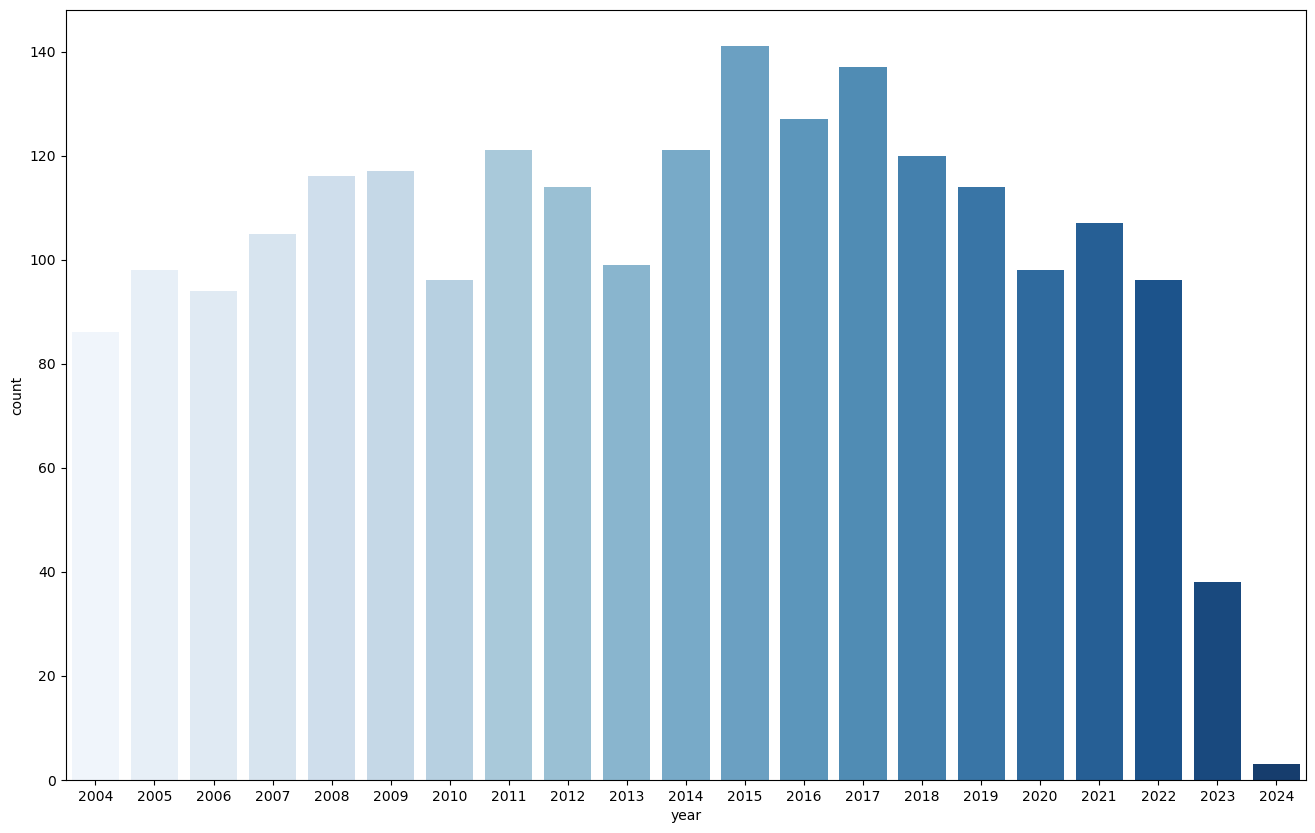

In [297]:
plt.figure(figsize=(16, 10))
sns.countplot(data=df, x="year", palette="Blues");

2. At what time of the year do the most attacks occur?

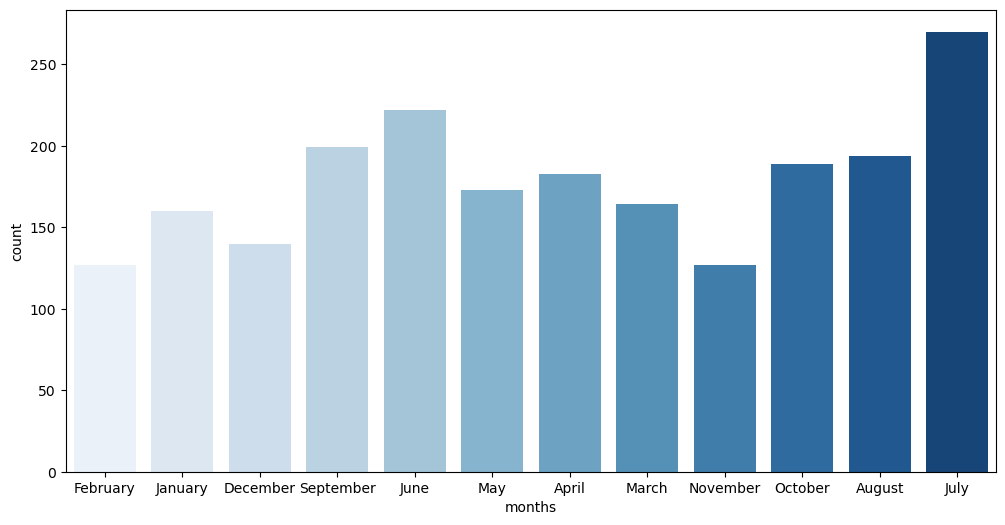

In [298]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="months", palette="Blues");

3. In which country do sharks attack the most?

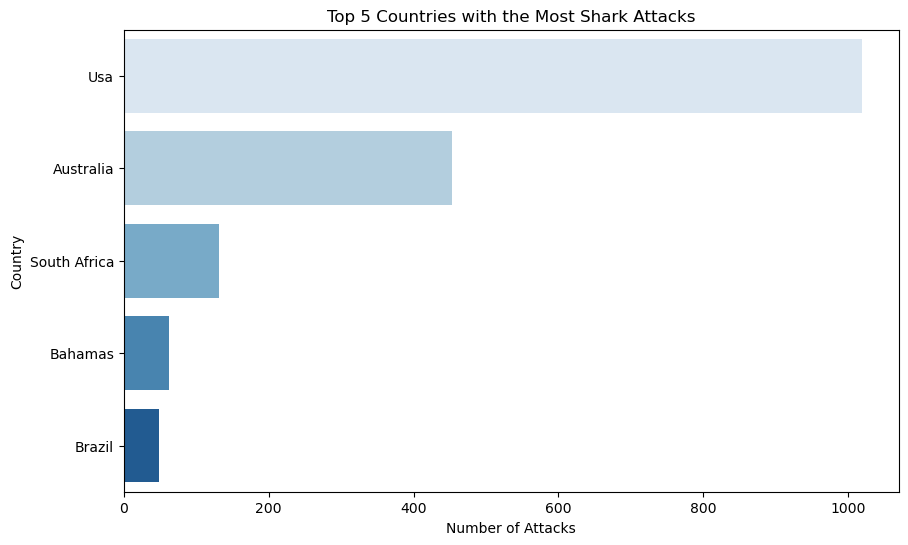

In [313]:
# Calcular el top 5 de países con el mayor número de ataques de tiburones
top_5_paises = df['country'].value_counts().head(5)

# Crear el gráfico de barras horizontales con Seaborn y paleta de colores azules
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_paises.values, y=top_5_paises.index, palette='Blues')  # Se especifica la paleta 'Blues' para azul
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.title('Top 5 Countries with the Most Shark Attacks')
plt.show()

4. What species of sharks do they attack most often?

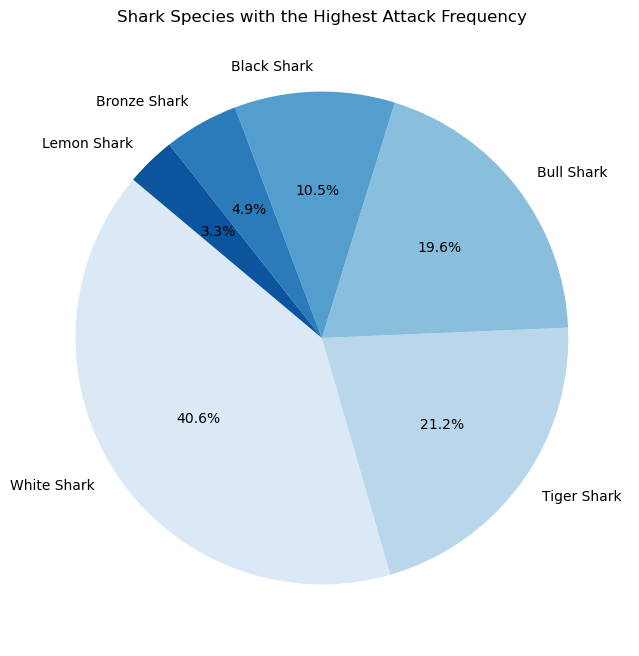

In [311]:
# Calcular la frecuencia de ataques para cada especie de tiburón
species_counts = df[df['species'] != 'Other']['species'].value_counts()

# Crear una paleta de colores azules
colors = sns.color_palette('Blues', len(species_counts))

# Crear el gráfico de torta con la paleta de colores azules
plt.figure(figsize=(20, 8))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Shark Species with the Highest Attack Frequency')
plt.show()

5. What kind of activities were the people who suffered shark attacks doing?

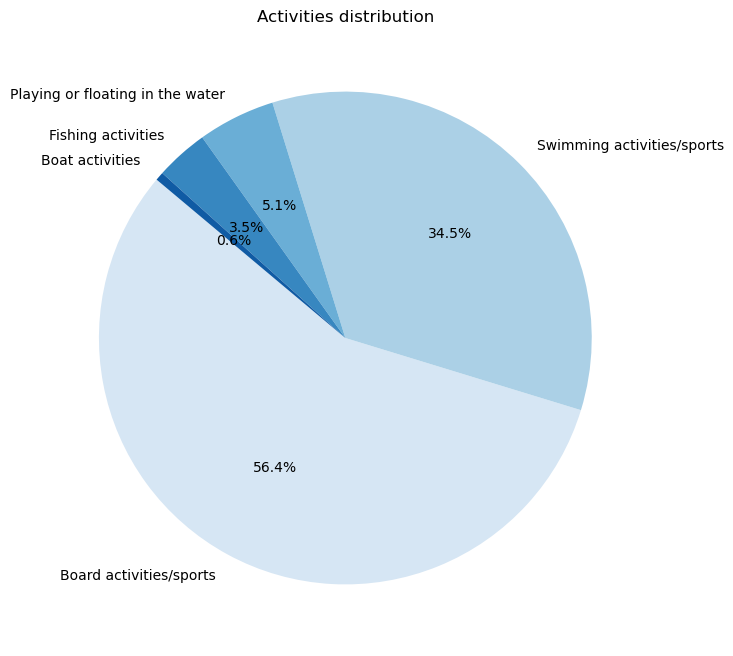

In [315]:
# Calcular la frecuencia de ataques para cada especie de tiburón
species_counts = df[df['activity'] != 'Other']['activity'].value_counts()

# Crear una paleta de colores azules
colors = sns.color_palette('Blues', len(species_counts))

# Crear el gráfico de torta con la paleta de colores azules
plt.figure(figsize=(20, 8))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Activities distribution')
plt.show()

## BONUS: Do sharks usually attack by provocation?

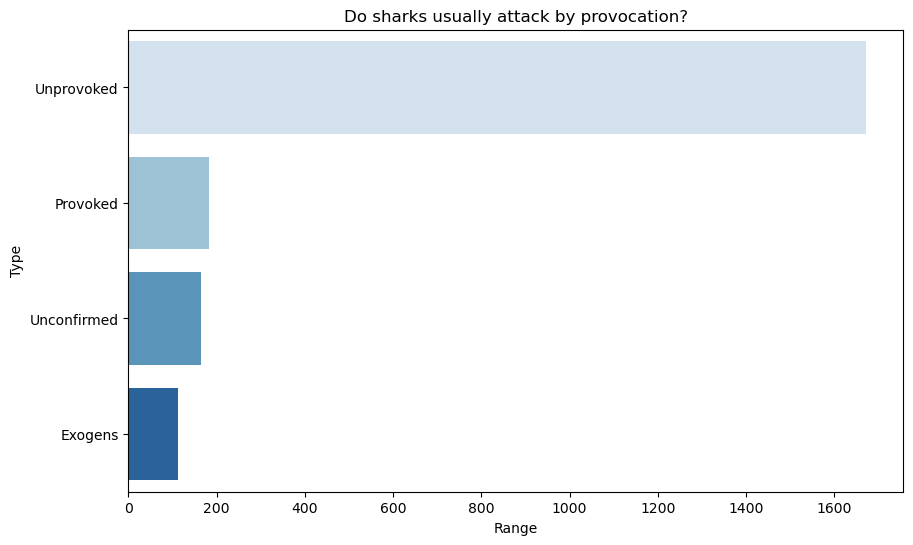

In [317]:
top_5_paises = df['type'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_paises.values, y=top_5_paises.index, palette='Blues') 
plt.xlabel('Range')
plt.ylabel('Type')
plt.title('Do sharks usually attack by provocation?')
plt.show()